In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./3observers.csv', delimiter=',', names=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])
data.head()

,x1,y1,x2,y2,x3,y3
0,9.971316,10.188162,11.146979,8.900454,10.116749,10.215672
1,7.317792,10.499101,9.675914,9.165734,12.444483,8.922228
2,10.045987,12.246268,11.285713,11.091920,10.992659,9.643713
3,10.461969,10.739149,9.495254,11.095641,9.080875,12.207989
4,11.446522,11.258019,8.053648,11.191351,9.628045,11.306075


In [3]:
last_row = data.iloc[-1]
last_row

x1    10.890939
y1     8.614729
x2    11.284727
y2     7.143297
x3     9.922515
y3     9.566721
Name: 305, dtype: float64

In [4]:
data1 = data.iloc[:-1][['x1', 'y1']].dropna()
data1.tail(1)

,x1,y1
304,8.998407,8.19142


In [5]:
data2 = data.iloc[:-1][['x2', 'y2']].dropna()
data2.tail(1)

,x2,y2
201,7.84894,7.949839


In [6]:
data3 = data.iloc[:-1][['x3', 'y3']].dropna()
data3.tail(1)

,x3,y3
118,7.68462,11.388845


In [7]:
mean1 = data1.mean().to_numpy().reshape(-1, 1)
cov1 = data1.cov().to_numpy()
cov1

array([[2.32696597, 0.99780745],
       [0.99780745, 1.99138448]])

In [8]:
mean2 = data2.mean().to_numpy().reshape(-1, 1)
cov2 = data2.cov().to_numpy()

In [9]:
mean3 = data3.mean().to_numpy().reshape(-1, 1)
cov3 = data3.cov().to_numpy()

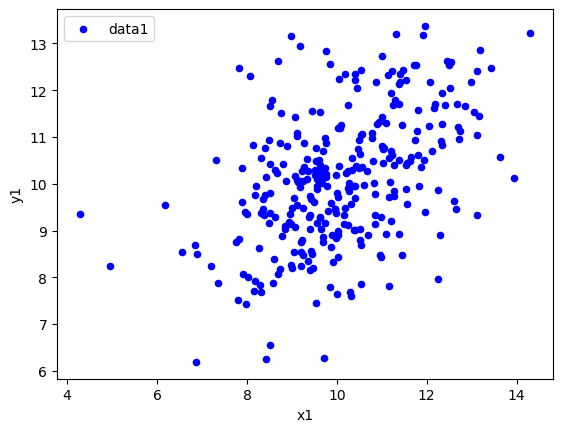

In [ ]:

plt.show()

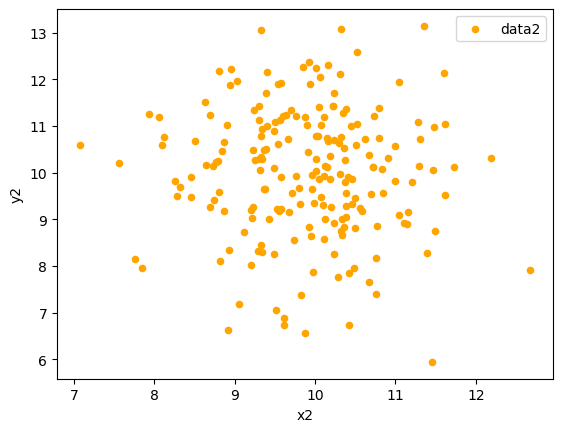

In [18]:
data2.plot.scatter(x='x2', y='y2', label='data2', color='orange')
plt.show()

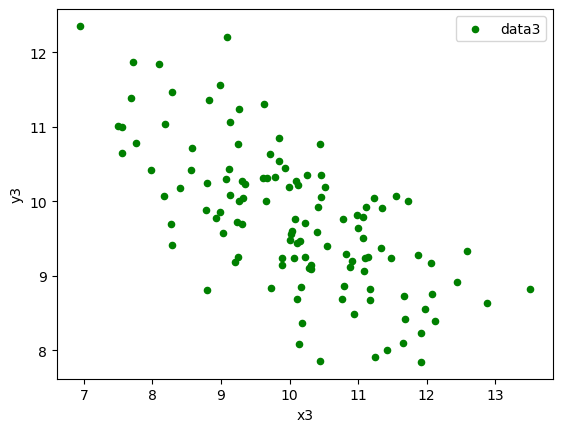

In [ ]:

plt.show()

In [13]:
# def normal_distribution(y, mean, cov):
#     y = y.reshape(-1, 1)
#     n = cov.shape[0]
#     const = 1 * (2*np.pi)**(-n/2) * np.sqrt(np.linalg.det(cov))
#     exp = np.exp(-1/2 * (y - mean).T @ np.linalg.inv(cov) @ (y - mean))
#     return const * exp

In [42]:
cov1_inv = np.linalg.inv(cov1)
cov2_inv = np.linalg.inv(cov2)
cov3_inv = np.linalg.inv(cov3)

y1, y2, y3 = last_row[['x1', 'y1']].to_numpy(), last_row[['x2', 'y2']].to_numpy(), last_row[['x3', 'y3']].to_numpy()

res = np.linalg.inv(cov1_inv + cov2_inv + cov3_inv) @ (cov1_inv @ y1 + cov2_inv @ y2 + cov3_inv @ y3)
res

array([10.99670625,  8.64669739])

In [27]:
mean_pt = pd.concat([data1, data2.rename(columns={'x2': 'x1', 'y2': 'y1'}), data3.rename(columns={'x3': 'x1', 'y3': 'y1'})]).mean(axis=0).to_numpy()
mean_pt

array([10.0180873 , 10.00340402])

In [29]:
last_row_mean = np.vstack([y1, y2, y3]).mean(axis=0)
last_row_mean

array([10.69939339,  8.44158241])

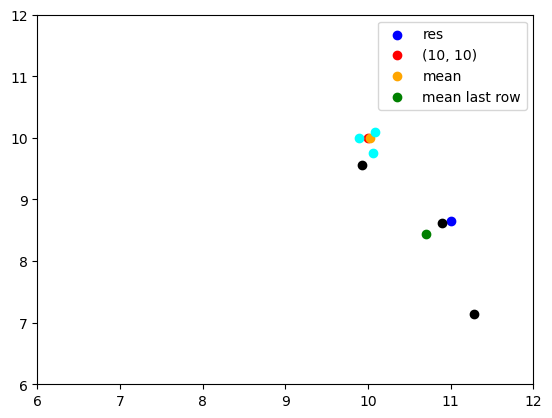

In [45]:
plt.scatter(*res, label='res', color='b')
plt.scatter(10, 10, label='(10, 10)', color='r')
plt.scatter(*mean_pt, label='mean', color='orange')
plt.scatter(*last_row_mean, label='mean last row', color='green')

plt.scatter(*y1, color='black')
plt.scatter(*y2, color='black')
plt.scatter(*y3, color='black')

plt.scatter(*mean1, color='cyan')
plt.scatter(*mean2, color='cyan')
plt.scatter(*mean3, color='cyan')

plt.xlim(6, 12)
plt.ylim(6, 12)
plt.legend()
plt.show()

In [40]:
y1, y2, y3

(array([10.89093888,  8.61472925]),
 array([11.28472675,  7.14329682]),
 array([9.92251454, 9.56672116]))